#### Charger ce dataset.
#### Utiliser les méthodes usuelles de pandas pour obtenir les informations de base sur ce dataset (nombre d'observations et de variables, types des variables, valeurs manquantes, etc.).

In [14]:
import pandas as pd

dataset = pd.read_excel('tabac.xlsx')
print(dataset.head())

print(dataset.info())
nb_observations = dataset.shape[0]
nb_variables = dataset.shape[1]
print("\nNombre d'observations", nb_observations)
print("Nombre de variables", nb_variables)
print("\nTypes des variables")
print(dataset.dtypes)
print("\nValeurs manquantes")
print(dataset.isnull().sum())

   Année  Prix relatif  Consommation
0   1950         121.0      5.198728
1   1951         108.4      5.309561
2   1952         114.1      5.348811
3   1953         113.9      5.323693
4   1954         112.5      5.306144
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Année         65 non-null     int64  
 1   Prix relatif  65 non-null     float64
 2   Consommation  65 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB
None

Nombre d'observations 65
Nombre de variables 3

Types des variables
Année             int64
Prix relatif    float64
Consommation    float64
dtype: object

Valeurs manquantes
Année           0
Prix relatif    0
Consommation    0
dtype: int64


#### Représenter par un nuage de points la variable "Consommation" en fonction de la variable "Prix relatif".

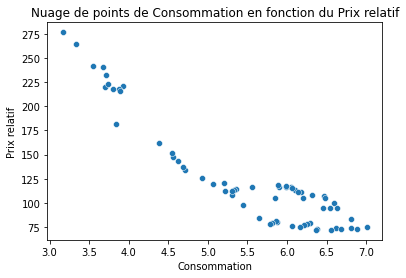

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

#le nuage de points
sns.scatterplot(x='Consommation', y='Prix relatif', data=dataset)
plt.title('Nuage de points de Consommation en fonction du Prix relatif')
plt.xlabel('Consommation')
plt.ylabel('Prix relatif')
plt.show()

#### Calculer le coefficient de corrélation entre ces deux variables (on pourra utiliser la fonction 'pearsonr' du module 'stats' de scipy). Interpréter sa valeur.

In [16]:
from scipy.stats import pearsonr

#le coefficient de corrélation de Pearson
coeff_correlation, valeur_p = pearsonr(dataset['Prix relatif'], dataset['Consommation'])
coeff_correlation, valeur_p

(-0.9230068524252116, 7.995107702890516e-28)

##### Il existe une corrélation négative entre le prix relatif et la consommation de tabac

#### Calculer l'équation de la droite de régression (on pourra utiliser la fonction 'linregress' du module 'stats' de scipy). La tracer.

[3.16391291 3.20274756 3.24158221 3.28041686 3.31925151 3.35808616
 3.39692081 3.43575546 3.47459011 3.51342476 3.55225941 3.59109406
 3.62992871 3.66876336 3.70759801 3.74643266 3.7852673  3.82410195
 3.8629366  3.90177125 3.9406059  3.97944055 4.0182752  4.05710985
 4.0959445  4.13477915 4.1736138  4.21244845 4.2512831  4.29011775
 4.3289524  4.36778705 4.4066217  4.44545635 4.484291   4.52312564
 4.56196029 4.60079494 4.63962959 4.67846424 4.71729889 4.75613354
 4.79496819 4.83380284 4.87263749 4.91147214 4.95030679 4.98914144
 5.02797609 5.06681074 5.10564539 5.14448004 5.18331469 5.22214933
 5.26098398 5.29981863 5.33865328 5.37748793 5.41632258 5.45515723
 5.49399188 5.53282653 5.57166118 5.61049583 5.64933048 5.68816513
 5.72699978 5.76583443 5.80466908 5.84350373 5.88233838 5.92117302
 5.96000767 5.99884232 6.03767697 6.07651162 6.11534627 6.15418092
 6.19301557 6.23185022 6.27068487 6.30951952 6.34835417 6.38718882
 6.42602347 6.46485812 6.50369277 6.54252742 6.58136207 6.6201

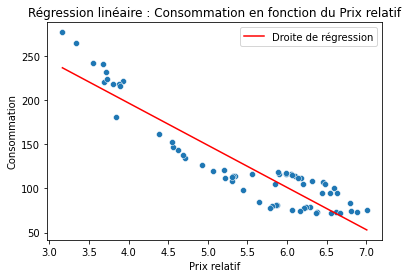

7.995107702890843e-28
Équation de la droite de régression :
Consommation = -47.69602137675147 * Prix relatif + 387.3079697989905


In [21]:
import numpy as np
from scipy.stats import linregress

#la régression linéaire
pente, ord_origine, coeff_corr, valeur_p, erreur_std = linregress(dataset['Consommation'], dataset['Prix relatif'])

#la droite de régression
x_valeurs = np.linspace(dataset['Consommation'].min(), dataset['Consommation'].max(), 100)
y_valeurs = pente * x_valeurs + ord_origine

sns.scatterplot(x='Consommation', y='Prix relatif', data=dataset)
plt.plot(x_valeurs, y_valeurs, color='red', label='Droite de régression')
plt.title('Régression linéaire : Consommation en fonction du Prix relatif')
plt.xlabel('Prix relatif')
plt.ylabel('Consommation')
plt.legend()
plt.show()
print(valeur_p)
print("Équation de la droite de régression :")
print("Consommation =", pente, "* Prix relatif +", ord_origine)